### Importing data and Datasets

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import linear_model
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('listings-2.csv')

/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Cleaning the Data

In [75]:
#reformatting price data
df.price = df.price.map(lambda x: x.replace("$", ''))
df.price = df.price.map(lambda x: x.replace(",", ''))
df.price = df.price.map(lambda x: float(x))

AttributeError: 'float' object has no attribute 'replace'

In [131]:
#changing true false values to 1's and 0's
df['host_is_superhost'] = df.host_is_superhost.apply(lambda x: 0 if x  == 'f' else 1)

In [5]:
#removing extraneous categories for property type
df= df[df['property_type'].isin(['Apartment','House', 'Townhouse', 'Condominium','Loft', 'Guest_suite', 'Boutique_hotel','Other']) ]

In [6]:
#reformatting categorical data values
df.property_type = df.property_type.map(lambda x: x.replace(" ","_"))
df.room_type = df.room_type.map(lambda x: x.replace(" ","_"))
df.room_type = df.room_type.map(lambda x: x.replace("/","_"))
df.bed_type = df.bed_type.map(lambda x: x.replace(" ","_"))
df.bed_type = df.bed_type.map(lambda x: x.replace("-","_"))
df.neighbourhood_group_cleansed = df.neighbourhood_group_cleansed.map(lambda x: x.replace(" ","_"))

In [77]:
#Removing outliers for price
q = df["price"].quantile(0.95)
df['price'] = df[df["price"] < q]

### Exploratory Data Analysis for Outcome Variables

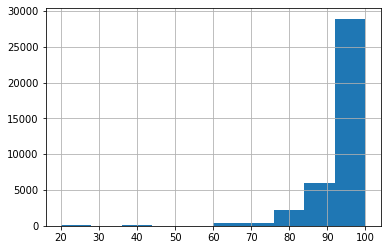

In [8]:
df['review_scores_rating'].hist()

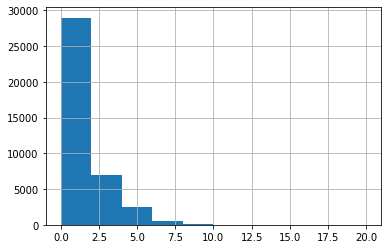

In [9]:
df['reviews_per_month'].hist()

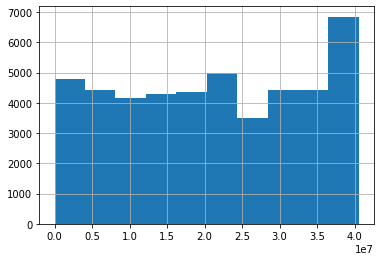

In [10]:
df['price'].hist()

### Subsetting the Data

In [24]:
# Dataframe for continous Variables
NY_cont = df[['host_listings_count','accommodates','bathrooms','bedrooms',
 'beds','price', 'availability_365', 'minimum_minimum_nights', 'maximum_minimum_nights',
 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm', 'review_scores_rating', 'review_scores_accuracy',
 'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
 'review_scores_location','review_scores_value','reviews_per_month' ]]

In [12]:
#Dummy Dataframes for Categorical Variables of Interest
prop_dum = pd.get_dummies(df['property_type'], drop_first=False)
room_dum = pd.get_dummies(df['room_type'], drop_first=False)
bed_dum = pd.get_dummies(df['bed_type'], drop_first=False)
bor_dum = pd.get_dummies(df['neighbourhood_group_cleansed'],prefix = 'borough', drop_first=False)

In [26]:
df_c = pd.concat([NY_cont, prop_dum, room_dum, bed_dum, bor_dum], axis=1)

### Covariance of Data

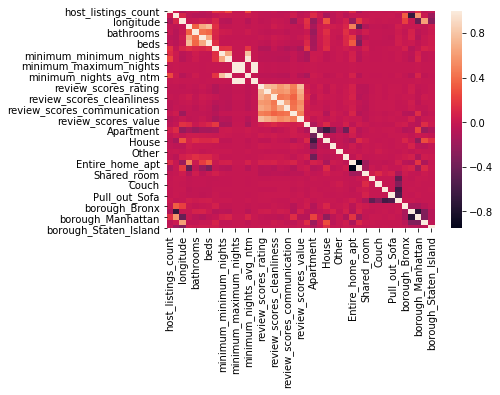

In [14]:
sns.heatmap(df_c.corr())
#significant correlations for review datas

### Linear Regressions

In [145]:
reg = linear_model.LinearRegression()
X = np.array(df_c['price'])
y = np.array(df_c.drop(columns=['price']))


In [146]:
#dont need to reshape y because its already 2 dimensional, need to reshape for x
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_imp = imp.fit_transform(np.array(X).reshape(-1, 1))
y_imp = imp.fit_transform(np.array(y))
reg.fit(X_imp, y_imp)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
#very different values for the regression, possibly because of the imputer
reg.score(X_imp, y_imp,sample_weight=None)

/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


3.180372218151512e-05

In [149]:
reg.coef_

array([8.47666376e-07])

array([[6., 1., 1., ..., 1., 0., 0.],
       [1., 2., 1., ..., 1., 0., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       ...,
       [2., 5., 1., ..., 0., 0., 0.],
       [2., 3., 2., ..., 0., 0., 0.],
       [1., 2., 1., ..., 0., 0., 0.]])